In [1]:
import numpy as np

# Problem 1: Prove whether the following functions are convex or not.
(a.)

(b.)

# Problem 2: Identify stationary points.

# Problem 3:

In [2]:
X_heart = np.loadtxt('/home/clewis7/repos/stor566-notebooks/hmw1/HW1/hw1_data/X_heart')
y_heart = np.loadtxt('/home/clewis7/repos/stor566-notebooks/hmw1/HW1/hw1_data/y_heart')
y_epsilons = np.loadtxt('/home/clewis7/repos/stor566-notebooks/hmw1/HW1/hw1_data/y_epsilonsubset')

(a.) Compute the gradient of f(w) w.r.t w

(b.)

In [70]:
def get_gradient(inputs, outputs, weights): 
    N = inputs.shape[0]
    summed = 0
    i = 0;
    for i in range(270):
        numerator = np.inner(outputs[i], inputs[i])
        denominator = 1 + np.exp(np.inner(np.inner(outputs[i], weights.T), inputs[i]))
        summed += (numerator / denominator)
        i += 1
    return ((-1/N)*summed) + weights

In [71]:
# what one step would look like
weights = np.ones(13,)
gradient = get_gradient(X_heart, y_heart, weights)
new_weights = weights - (0.05*gradient)

In [72]:
gradient

array([0.989812  , 0.91035872, 0.88347504, 1.05226997, 1.07088846,
       1.17841771, 1.030824  , 0.99296678, 1.04583797, 1.10093331,
       1.06646291, 1.06226594, 0.97773412])

In [7]:
new_weights

array([0.9505094 , 0.95448206, 0.95582625, 0.9473865 , 0.94645558,
       0.94107911, 0.9484588 , 0.95035166, 0.9477081 , 0.94495333,
       0.94667685, 0.9468867 , 0.95111329])

Find small (eta1) such that the algorithm converges.
(eta1) = 0.8

In [121]:
# 50 iteration with stepsize 0.8 shows convergence 
eta1_weights = np.ones(13,)
iter_weights1 = list()
iter_weights1.append(eta1_weights)
step_size = 0.1
eta1_gradients = list()
i = 0
while i < 50:
    gradient = get_gradient(X_heart, y_heart, eta1_weights)
    eta1_gradients.append(gradient)
    eta1_weights = eta1_weights - (step_size*gradient)
    iter_weights1.append(eta1_weights)
    i += 1

Increase step size to (eta2) so the algorithm cannot converge.
(eta2) = 

In [130]:
# bigger step size for 50 iterations that does not converge
eta2_weights = np.ones(13,)
iter_weights2 = list()
iter_weights2.append(eta2_weights)
step_size = 2
eta2_gradients = list()
i = 0
while i < 50:
    gradient = get_gradient(X_heart, y_heart, eta2_weights)
    eta2_gradients.append(gradient)
    eta2_weights = eta2_weights - (step_size*gradient)
    iter_weights2.append(eta2_weights)
    i += 1

Plot the iteration vs log(f(xk)-f(x*)) for both eta1 and eta2

In [132]:
def func_eval(inputs, outputs, weights):
    n = inputs.shape[0]
    summation = 0
    for i in range(n):
        exponential = np.exp(-np.inner(np.inner(outputs[i], weights.T), inputs[i]))
        summation += np.log(1 + exponential)
    summation = summation / n
    return summation + np.inner(weights.T, weights) * 0.5

In [133]:
eta1_losses = list()
for i in range(50):
    eta1_losses.append(func_eval(X_heart, y_heart, iter_weights1[i]))

In [134]:
eta2_losses = list()
for i in range(50):
    eta2_losses.append(func_eval(X_heart, y_heart, iter_weights2[i]))

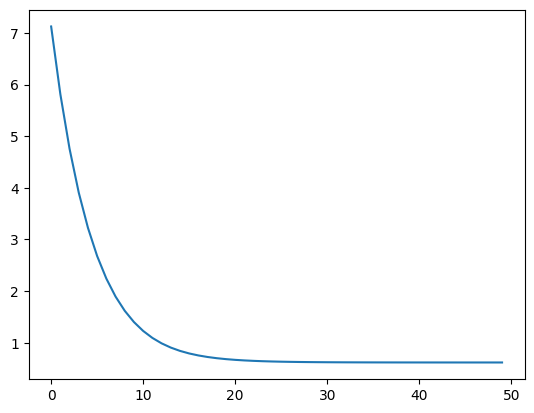

In [137]:
from matplotlib import pyplot as plt
plt.plot(eta1_losses)

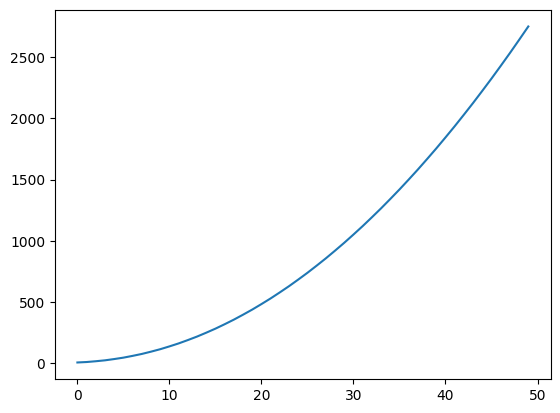

In [138]:
plt.plot(eta2_losses)

(c.)

Initialize the weights w0
For each iteration...
    * compute the gradient
    * divide stepsize by two each time
        break if
    * update the weights
return final solution w 

(d.)

In [ ]:
# implement gd w backtracking line search
# use get_gradient function
# write checker function

In [142]:
def check_conditions(weights, sigma, step_size):
    gradient = get_gradient(X_heart, y_heart, weights)
    first_loss = func_eval(X_heart, y_heart, weights)
    if func_eval(X_heart, y_heart, weights + (step_size * gradient)) <= first_loss + (sigma*step_size*np.inner(func_eval(X_heart, y_heart, weights).T,gradient)):
        return weights + step_size*gradient
    else:
        weights = weights - (step_size * gradient)
        check_conditions(weights, sigma, step_size/2)

In [143]:
weights = np.ones(13,)
check_conditions(weights, 0.01, 0.8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

(e.)
test implementation on epsilon subset
plot iteration by error plot